<a href="https://colab.research.google.com/github/mahiiin/task3-linear_regression/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/Housing.csv')

# Display first few rows
print(data.head())

# Check basic info
print(data.info())

# Check if there are missing values
print(data.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [46]:
# See all column names
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [47]:
# Select feature and target for Simple Linear Regression
X = data[['area']]    # feature must be 2D
y = data['price']     # target is 1D

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of splits
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)

Training feature shape: (436, 1)
Testing feature shape: (109, 1)


In [48]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the model coefficients
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

Intercept (b0): 2512254.2639593435
Slope (b1): 425.72984193878284


In [49]:
# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R-squared (R²): 0.27287851871974644


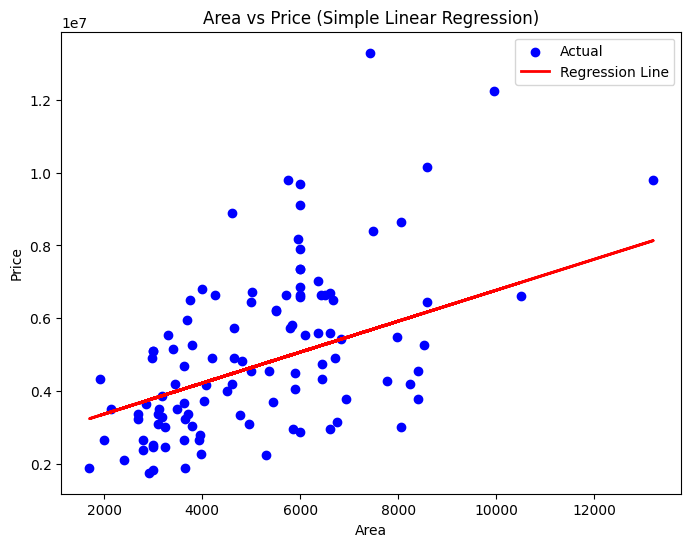

In [50]:
# Plotting
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Area vs Price (Simple Linear Regression)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
# Select multiple features
X_multi = data[['area', 'bedrooms', 'bathrooms', 'stories']]  # <- you can add more if you want
y_multi = data['price']

# Split into train and test
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

print("Training features shape:", X_train_multi.shape)
print("Testing features shape:", X_test_multi.shape)

Training features shape: (436, 4)
Testing features shape: (109, 4)


In [52]:
# Initialize the Linear Regression model
model_multi = LinearRegression()

# Fit the model on the training data
model_multi.fit(X_train_multi, y_train_multi)

# Print model intercept and coefficients
print("Intercept (b0):", model_multi.intercept_)
print("Coefficients (b1, b2, b3, ...):", model_multi.coef_)

# Match coefficients with feature names
coefficients = pd.DataFrame({'Feature': X_multi.columns, 'Coefficient': model_multi.coef_})
print(coefficients)


Intercept (b0): -64342.420905679464
Coefficients (b1, b2, b3, ...): [3.49009738e+02 1.74685138e+05 1.25815095e+06 4.83859660e+05]
     Feature   Coefficient
0       area  3.490097e+02
1   bedrooms  1.746851e+05
2  bathrooms  1.258151e+06
3    stories  4.838597e+05


In [53]:
# Predict on the testing set
y_pred_multi = model_multi.predict(X_test_multi)

# Evaluate the model
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("Mean Absolute Error (MAE):", mae_multi)
print("Mean Squared Error (MSE):", mse_multi)
print("R-squared (R²):", r2_multi)


Mean Absolute Error (MAE): 1158970.4803166878
Mean Squared Error (MSE): 2457741642022.087
R-squared (R²): 0.513758534903707


In [54]:
# Example new house features
new_house = np.array([[4000, 3, 2, 2]])  # Note: 2D array

# Predict price
predicted_price = model_multi.predict(new_house)

print("Predicted Price for the new house:", predicted_price[0])


Predicted Price for the new house: 5339773.17082078


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
# Create a summary dictionary
summary = {
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression'],
    'Mean Absolute Error (MAE)': [mae, mae_multi],
    'Mean Squared Error (MSE)': [mse, mse_multi],
    'R-squared (R²)': [r2, r2_multi]
}

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# Display the summary table
print(summary_df)


                        Model  Mean Absolute Error (MAE)  \
0    Simple Linear Regression               1.474748e+06   
1  Multiple Linear Regression               1.158970e+06   

   Mean Squared Error (MSE)  R-squared (R²)  
0              3.675287e+12        0.272879  
1              2.457742e+12        0.513759  
